# Portfolio

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [3]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META']
amounts  = [20, 10, 30, 10]

In [4]:
portfolio = {
    'AMD': {
                'amount': 20,
                'date': dt.datetime(2023, 9, 30)
           },
    'AMZN': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
    'BAC': {
                'amount': 30,
                'date': dt.datetime(2023, 9, 30)
           },
    'META': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
}

In [34]:
dl = []
for ticker in list(portfolio.items()):
    print(ticker[0], ticker[1]['date'])
    dl.append(
        [ticker[0],
        yf.download(ticker[0], ticker[1]['date'], dt.datetime.now(), auto_adjust=True)]
    )
dl

AMD 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
AMZN 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
BAC 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
META 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed


[['AMD',                   Open        High         Low       Close     Volume
  Date                                                                 
  2023-10-02  102.209999  103.709999  101.699997  103.269997   45118600
  2023-10-03  101.800003  103.290001   99.169998  100.080002   48117000
  2023-10-04  100.650002  104.400002  100.339996  104.070000   51023200
  2023-10-05  103.410004  103.739998  100.269997  102.910004   51789700
  2023-10-06  102.160004  107.870003  102.029999  107.239998   64807500
  2023-10-09  106.010002  107.309998  104.790001  106.970001   39593200
  2023-10-10  107.489998  110.120003  106.400002  109.010002   57105500
  2023-10-11  109.139999  110.099998  106.930000  108.309998   51085600
  2023-10-12  108.400002  111.309998  107.510002  108.790001   60959400
  2023-10-13  108.650002  108.970001  104.750000  105.089996   52881500
  2023-10-16  105.419998  107.480003  105.029999  106.459999   42464500
  2023-10-17  103.540001  106.290001  101.660004  105.139

In [5]:
df = yf.download(list(portfolio.keys()), dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df

[*********************100%***********************]  4 of 4 completed


Close                                           High  \
                   AMD        AMZN        BAC        META         AMD   
Date                                                                    
2023-01-03   64.019997   85.820000  32.498127  124.739998   66.879997   
2023-01-04   64.660004   85.139999  33.109104  127.370003   65.790001   
2023-01-05   62.330002   83.120003  33.041218  126.940002   64.349998   
2023-01-06   63.959999   86.080002  33.370949  130.020004   64.300003   
2023-01-09   67.239998   87.360001  32.866650  129.470001   69.320000   
...                ...         ...        ...         ...         ...   
2023-11-30  121.160004  146.089996  30.490000  327.149994  124.050003   
2023-12-01  121.389999  147.029999  30.959999  324.820007  121.400002   
2023-12-04  118.570000  144.839996  30.820000  320.019989  119.900002   
2023-12-05  118.379997  146.880005  30.580000  318.290009  118.489998   
2023-12-06  117.584999  145.634995  30.870001  319.369995  122.831299   

                                                      Low              \
                  AMZN        BAC        META         AMD        AMZN   
Date                                                                    
2023-01-03   86.959999  33.060615  126.370003   63.590000   84.209999   
2023-01-04   86.980003  33.768571  129.050003   63.310001   83.360001   
2023-01-05   85.419998  33.109104  128.520004   62.299999   83.070000   
2023-01-06   86.400002  33.535817  130.330002   60.049999   81.430000   
2023-01-09   89.480003  33.710378  132.949997   65.669998   87.080002   
...                ...        ...         ...         ...         ...   
2023-11-30  146.929993  30.549999  333.500000  119.650002  144.330002   
2023-12-01  147.250000  31.049999  326.859985  118.650002  145.550003   
2023-12-04  145.350006  31.000000  320.859985  116.370003  142.809998   
2023-12-05  148.570007  30.790001  321.880005  116.449997  143.130005   
2023-12-06  147.830002  31.514999  322.250000  117.059998  145.020004   

                                         Open                         \
                  BAC        META         AMD        AMZN        BAC   
Date                                                                   
2023-01-03  32.207187  122.279999   66.000000   85.459999  32.226583   
2023-01-04  32.808467  125.849998   65.000000   86.550003  32.876353   
2023-01-05  32.566016  124.540001   64.150002   85.330002  32.895746   
2023-01-06  32.527221  126.040001   63.150002   83.029999  33.060612   
2023-01-09  32.692085  129.279999   66.220001   87.459999  33.700681   
...               ...         ...         ...         ...        ...   
2023-11-30  30.040001  322.399994  123.610001  144.759995  30.209999   
2023-12-01  30.350000  320.760010  119.879997  146.000000  30.400000   
2023-12-04  30.520000  313.660004  119.750000  145.250000  30.530001   
2023-12-05  30.330000  315.390015  117.430000  143.550003  30.680000   
2023-12-06  30.760000  317.670105  120.690002  147.580002  30.780001   

                          Volume                                
                  META       AMD      AMZN       BAC      META  
Date                                                            
2023-01-03  122.820000  46851800  76706000  35221500  35528500  
2023-01-04  127.379997  47477100  68885100  41998500  32397100  
2023-01-05  126.129997  46159500  67930800  34177000  25447100  
2023-01-06  128.970001  70161300  83303400  34068700  27584500  
2023-01-09  131.160004  69741300  65266100  43818800  26649100  
...                ...       ...       ...       ...       ...  
2023-11-30  331.890015  44494200  65814000  52547700  23146400  
2023-12-01  325.480011  37017600  39924600  46088100  15264700  
2023-12-04  317.290009  39854400  48294200  37811300  19037100  
2023-12-05  318.980011  38814800  46754800  45710600  16926700  
2023-12-06  321.929993  42322549  24073404  34078750   7348020  

[234 rows x 20 columns]

In [6]:
prices = df['Close']

In [8]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.498131,124.739998
2023-01-04,64.660004,85.139999,33.109100,127.370003
2023-01-05,62.330002,83.120003,33.041218,126.940002
2023-01-06,63.959999,86.080002,33.370953,130.020004
2023-01-09,67.239998,87.360001,32.866653,129.470001
...,...,...,...,...
2023-11-28,122.010002,147.029999,29.296177,338.989990
2023-11-29,123.849998,146.320007,30.070000,332.200012
2023-11-30,121.160004,146.089996,30.490000,327.149994


In [7]:
total = []
for t, am in zip(tickers, amounts):
    total.append(prices[t][-1] * am)

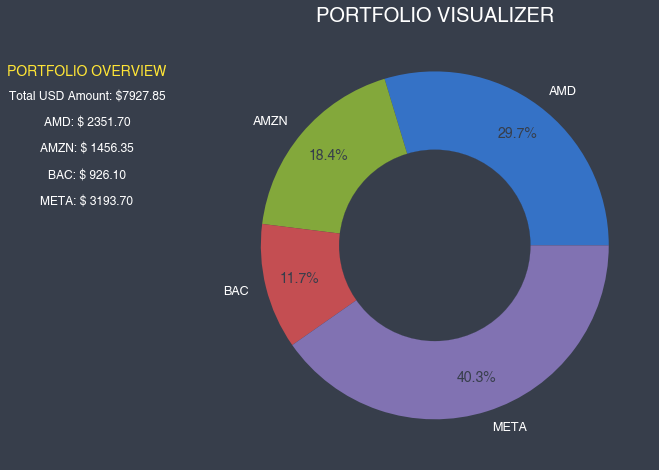

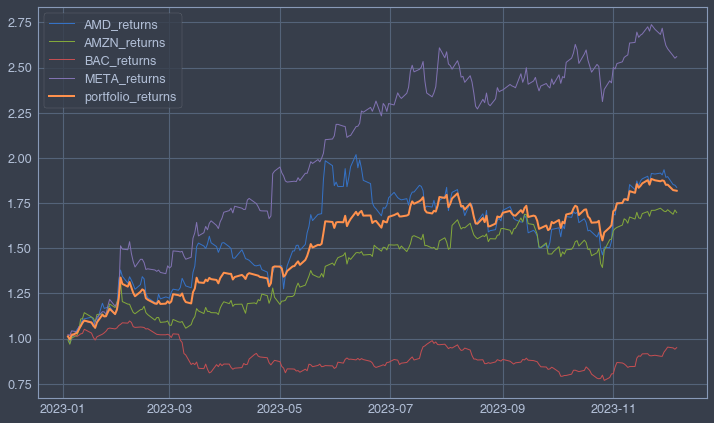

In [15]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('PORTFOLIO VISUALIZER', color='w', fontsize=20)

patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8);

[text.set_color('w') for text in texts]
[autotext.set_color('#373E4B') for autotext in autotexts]
[autotext.set_fontsize(14) for autotext in autotexts]

my_circle = plt.Circle((0, 0), 0.55, color='#373E4B')
plt.gca().add_artist(my_circle)

ax.text(-2, 1, 'PORTFOLIO OVERVIEW', fontsize=14,
                                     color='#ffe536',
                                     verticalalignment='center',
                                     horizontalalignment='center')

ax.text(-2, 0.85, f'Total USD Amount: ${sum(total):.2f}',
                                        fontsize=12, color='w',
                                        verticalalignment='center',
                                        horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.85-counter, f'{ticker}: ${total[tickers.index(ticker)]: .2f}',
                              fontsize=12, color='w',
                              verticalalignment='center',
                              horizontalalignment='center')
    counter += 0.15

fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()

## Returns

In [9]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998
2023-01-04,64.660004,85.139999,33.109104,127.370003
2023-01-05,62.330002,83.120003,33.041218,126.940002
2023-01-06,63.959999,86.080002,33.370949,130.020004
2023-01-09,67.239998,87.360001,32.866650,129.470001
...,...,...,...,...
2023-11-30,121.160004,146.089996,30.490000,327.149994
2023-12-01,121.389999,147.029999,30.959999,324.820007
2023-12-04,118.570000,144.839996,30.820000,320.019989


In [10]:
prices['portfolio'] = 0
prices

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,AMD,AMZN,BAC,META,portfolio
Date,,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998,0
2023-01-04,64.660004,85.139999,33.109104,127.370003,0
2023-01-05,62.330002,83.120003,33.041218,126.940002,0
2023-01-06,63.959999,86.080002,33.370949,130.020004,0
2023-01-09,67.239998,87.360001,32.866650,129.470001,0
...,...,...,...,...,...
2023-11-30,121.160004,146.089996,30.490000,327.149994,0
2023-12-01,121.389999,147.029999,30.959999,324.820007,0
2023-12-04,118.570000,144.839996,30.820000,320.019989,0


In [11]:
for i in portfolio.keys():
    prices['portfolio'] += prices[i]*portfolio[i]['amount']

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [12]:
for t in prices.columns:
    prices[f'{t}_returns'] = np.log(prices[t].div(prices[t].shift(1)))

prices

,AMD,AMZN,BAC,META,portfolio,AMD_returns,AMZN_returns,BAC_returns,META_returns,portfolio_returns
Date,,,,,,,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998,4360.943718,NaN,NaN,NaN,NaN,NaN
2023-01-04,64.660004,85.139999,33.109104,127.370003,4411.573219,0.009947,-0.007955,0.018626,0.020865,0.011543
2023-01-05,62.330002,83.120003,33.041218,126.940002,4338.436623,-0.036700,-0.024012,-0.002052,-0.003382,-0.016717
2023-01-06,63.959999,86.080002,33.370949,130.020004,4441.328506,0.025815,0.034992,0.009930,0.023974,0.023439
2023-01-09,67.239998,87.360001,32.866650,129.470001,4499.099464,0.050010,0.014760,-0.015227,-0.004239,0.012924
...,...,...,...,...,...,...,...,...,...,...
2023-11-30,121.160004,146.089996,30.490000,327.149994,8070.299969,-0.021959,-0.001573,0.013871,-0.015318,-0.011580
2023-12-01,121.389999,147.029999,30.959999,324.820007,8075.100021,0.001896,0.006414,0.015297,-0.007148,0.000595
2023-12-04,118.570000,144.839996,30.820000,320.019989,7944.599838,-0.023505,-0.015007,-0.004532,-0.014888,-0.016293


In [13]:
prices.dropna(inplace=True)

f:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


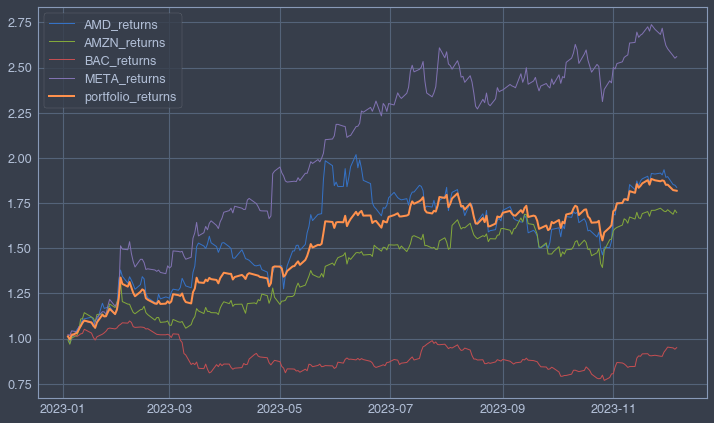

In [14]:
fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()

## Covariance

In [16]:
returns = prices[['AMD_returns', 'AMZN_returns', 'BAC_returns', 'META_returns']]
returns

,AMD_returns,AMZN_returns,BAC_returns,META_returns
Date,,,,
2023-01-04,0.009947,-0.007955,0.018626,0.020865
2023-01-05,-0.036700,-0.024012,-0.002052,-0.003382
2023-01-06,0.025815,0.034992,0.009930,0.023974
2023-01-09,0.050010,0.014760,-0.015227,-0.004239
2023-01-10,0.011974,0.028327,0.006764,0.026825
...,...,...,...,...
2023-11-30,-0.021959,-0.001573,0.013871,-0.015318
2023-12-01,0.001896,0.006414,0.015297,-0.007148
2023-12-04,-0.023505,-0.015007,-0.004532,-0.014888


In [17]:
cov_matrix = returns.cov()
cov_matrix

,AMD_returns,AMZN_returns,BAC_returns,META_returns
AMD_returns,0.000856,0.000314,0.000085,0.000329
AMZN_returns,0.000314,0.000451,0.000065,0.000303
BAC_returns,0.000085,0.000065,0.000281,0.000085
META_returns,0.000329,0.000303,0.000085,0.000602


In [16]:
corr_matrix = returns.corr()

In [18]:
corr_matrix

,AMD_returns,AMZN_returns,BAC_returns,META_returns
AMD_returns,1.000000,0.506093,0.174031,0.459091
AMZN_returns,0.506093,1.000000,0.186871,0.583570
BAC_returns,0.174031,0.186871,1.000000,0.206726
META_returns,0.459091,0.583570,0.206726,1.000000


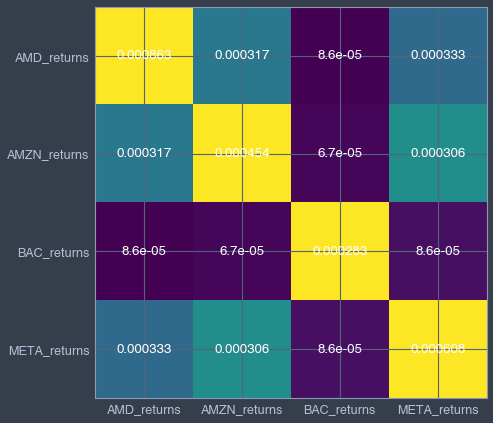

In [20]:
fig, ax = plt.subplots()
ax.imshow(corr_matrix)

ax.set_xticks(np.arange(len(corr_matrix)))
ax.set_xticklabels(returns.columns)
ax.set_yticks(np.arange(len(corr_matrix)))
ax.set_yticklabels(returns.columns)

for i in range(len(returns.columns)):
    for j in range(len(returns.columns)):
        text = ax.text(j, i, round(cov_matrix.iloc[i, j], 6),
                       ha="center", va="center", color="w")

In [45]:
lw = covariance.ledoit_wolf(returns)[0]
lw

array([[8.29870974e-04, 2.85338124e-04, 7.73027331e-05, 2.99689942e-04],
       [2.85338124e-04, 4.61012923e-04, 6.01913684e-05, 2.76142599e-04],
       [7.73027331e-05, 6.01913684e-05, 3.07292820e-04, 7.70775815e-05],
       [2.99689942e-04, 2.76142599e-04, 7.70775815e-05, 6.00112399e-04]])

In [47]:
dates = returns.resample('M').first().index
dates

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [48]:
sample_covs = []
lw_covs = []

for i in range(1, len(dates)):
    sample_cov = returns[dates[i-1]:dates[i]].cov().values
    sample_covs.append(sample_cov)
    
    lw_cov = covariance.ledoit_wolf(returns[dates[i-1]:dates[i]])[0]
    lw_covs.append(lw_cov)

lw_diffs = []
for pair in zip(lw_covs[:-1], lw_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    lw_diffs.append(diff)
    
sample_diffs = []
for pair in zip(sample_covs[:-1], sample_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    sample_diffs.append(diff)

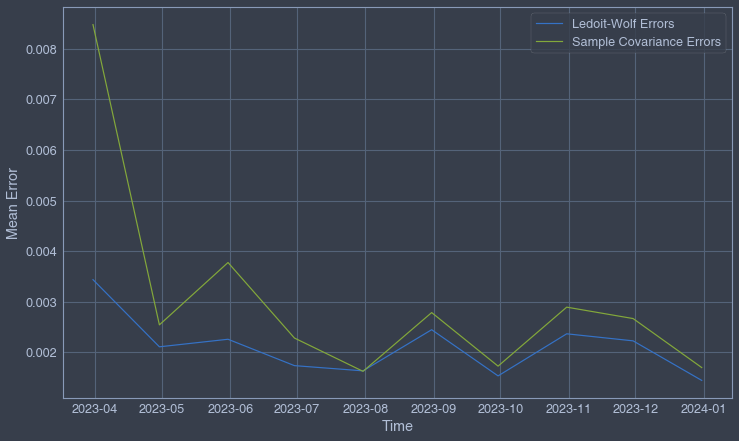

In [49]:
plt.plot(dates[2:], lw_diffs)
plt.plot(dates[2:], sample_diffs)
plt.xlabel('Time')
plt.ylabel('Mean Error')
plt.legend(['Ledoit-Wolf Errors', 'Sample Covariance Errors']);

In [32]:
s_returns = [col for col in prices.columns if '_returns' in col and col != 'portfolio_returns']
s_returns

['AMD_returns', 'AMZN_returns', 'BAC_returns', 'META_returns']

In [33]:
returns_pair_pairs = [(a, b) for idx, a in enumerate(s_returns) for b in s_returns[idx + 1:]]
returns_pair_pairs

[('AMD_returns', 'AMZN_returns'),
 ('AMD_returns', 'BAC_returns'),
 ('AMD_returns', 'META_returns'),
 ('AMZN_returns', 'BAC_returns'),
 ('AMZN_returns', 'META_returns'),
 ('BAC_returns', 'META_returns')]

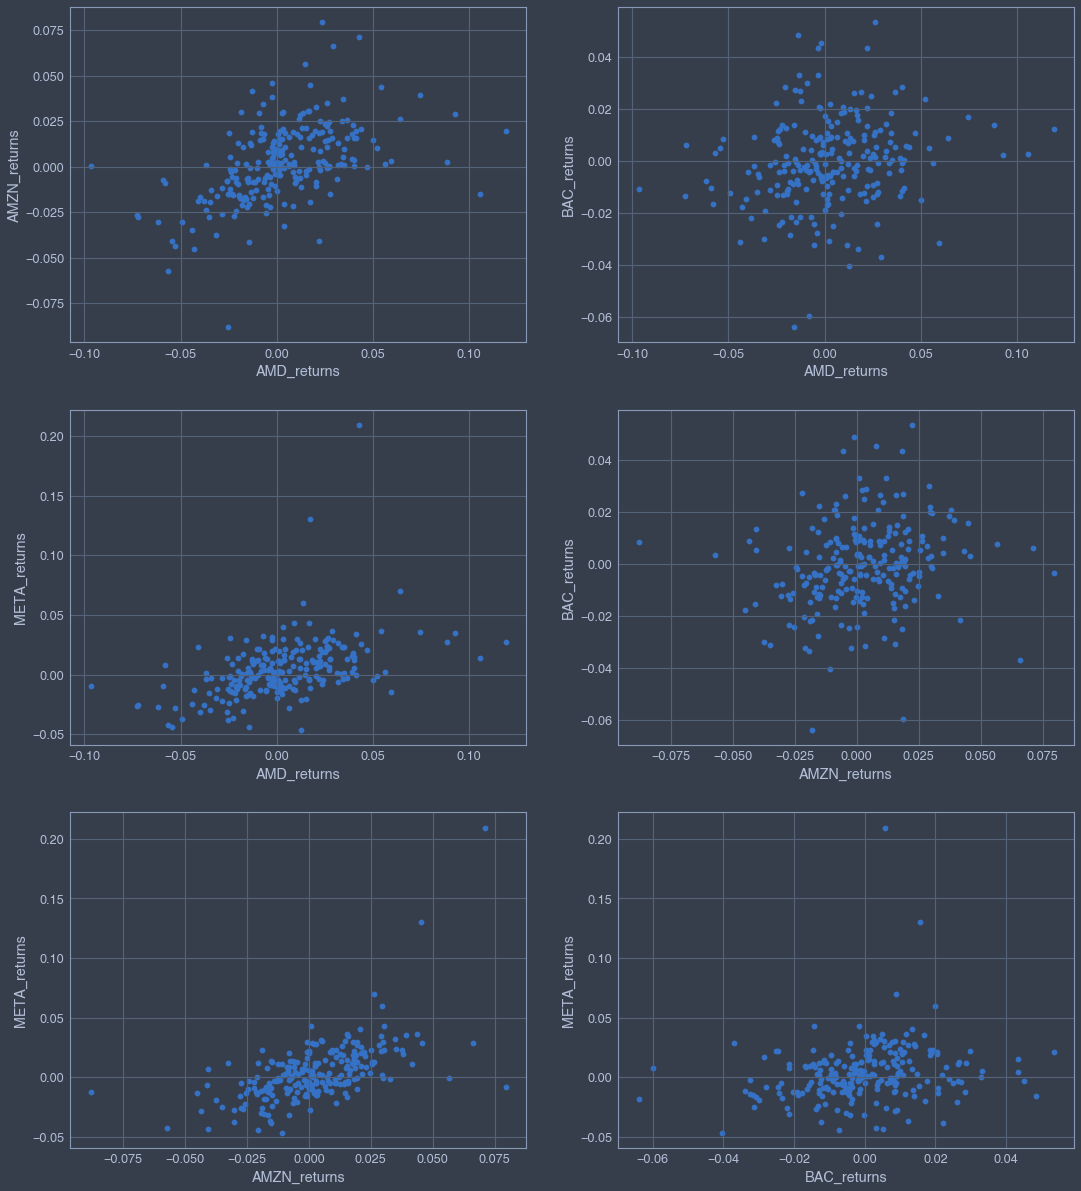

In [77]:
fig, axs = plt.subplots(int(len(returns_pair_pairs)/2), 2, figsize=(18, 21))

i = 0
for x in range(0, int(len(returns_pair_pairs)/2)):
    for y in range(0, 2):
        axs[x, y].scatter(prices[returns_pair_pairs[i][0]], prices[returns_pair_pairs[i][1]])
        axs[x, y].set_xlabel(returns_pair_pairs[i][0])
        axs[x, y].set_ylabel(returns_pair_pairs[i][1])
        i+=1
